In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df = pd.read_csv('House Price Prediction Dataset.csv')

print("Dataset Information:")
print("=" * 50)
df.info()

print("\n\nDescriptive Statistics:")
print("=" * 50)
print(df.describe())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


Descriptive Statistics:
                Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000   

In [27]:
print("\n\nUnique Values in Categorical Columns:")
print("=" * 50)
print(f"Location unique values: {df['Location'].unique()}")
print(f"Condition unique values: {df['Condition'].unique()}")
print(f"Garage unique values: {df['Garage'].unique()}")

print("\n\nFirst 5 Rows:")
print("=" * 50)
print(df.head())




Unique Values in Categorical Columns:
Location unique values: ['Downtown' 'Suburban' 'Urban' 'Rural']
Condition unique values: ['Excellent' 'Good' 'Fair' 'Poor']
Garage unique values: ['No' 'Yes']


First 5 Rows:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  


In [29]:
#Data Preprocessing

df = df.drop('Id', axis=1) #Useless column

X = df.drop('Price', axis=1) 
y = df['Price'] #target column

X['Garage'] = X['Garage'].map({'Yes' : 1, 'No' : 0}) #Encoding

numerical_features = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Garage']
ordinal_features = ['Condition']
nominal_features = ['Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Excellent']]), ordinal_features),
        ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_features)
    ]
)


In [51]:
df = df.head()
df

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [53]:
#Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Training set shape: {X_train_processed.shape}")
print(f"Testing set shape: {X_test_processed.shape}")

Training set shape: (1600, 10)
Testing set shape: (400, 10)


In [55]:
#Model Training

print("Training Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)
print("Linear Regression model trained successfully!")


Training Linear Regression model...
Linear Regression model trained successfully!


In [57]:
#Model Evaluation

lr_predictions = lr_model.predict(X_test_processed)

#Calculating metrics 
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print("Linear Regression Performance:")
print("=" * 50)
print(f"Mean Absolute Error (MAE): ${lr_mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${lr_rmse:,.2f}")


Linear Regression Performance:
Mean Absolute Error (MAE): $243,453.00
Root Mean Squared Error (RMSE): $280,057.77


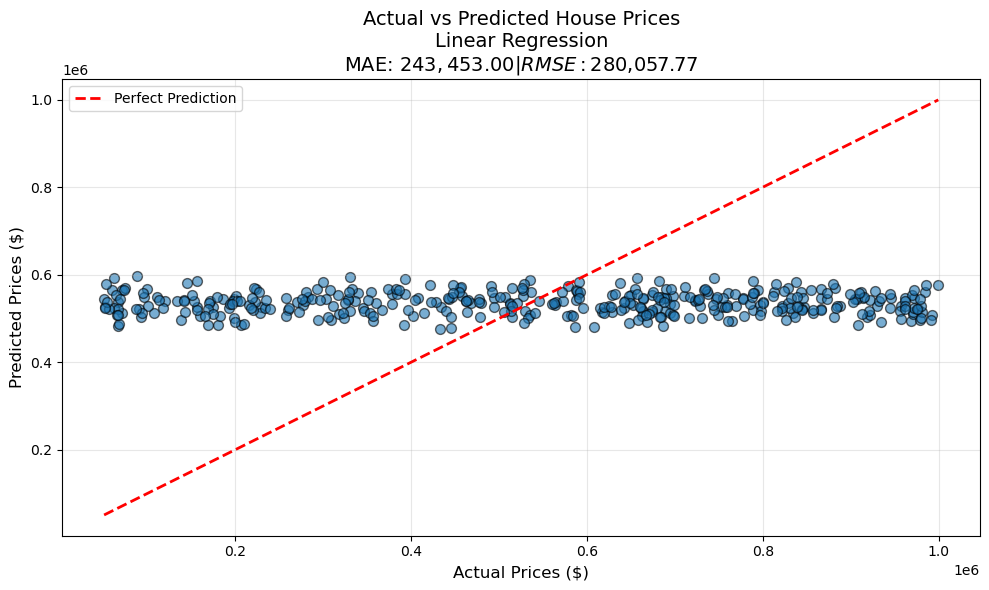


Model: Linear Regression
This model achieved an MAE of $243,453.00 and RMSE of $280,057.77


In [59]:
#Visualization and Insights

model_name = "Linear Regression"
predictions = lr_predictions 
mae = lr_mae               
rmse = lr_rmse             

#Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolors='k', s=50)

#Adding perfect prediction line (45-degree line)
min_val = min(y_test.min(), predictions.min())
max_val = max(y_test.max(), predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Prices ($)', fontsize=12)
plt.ylabel('Predicted Prices ($)', fontsize=12)
plt.title(f'Actual vs Predicted House Prices\n{model_name}\nMAE: ${mae:,.2f} | RMSE: ${rmse:,.2f}', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nModel: {model_name}")
print(f"This model achieved an MAE of ${mae:,.2f} and RMSE of ${rmse:,.2f}")